In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for manual legend
%matplotlib notebook
import pickle

In [3]:
def load_obj(name ):
    """
    Load numpy array in pickle format
    :param name:
    :return:
    """
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

<IPython.core.display.Javascript object>


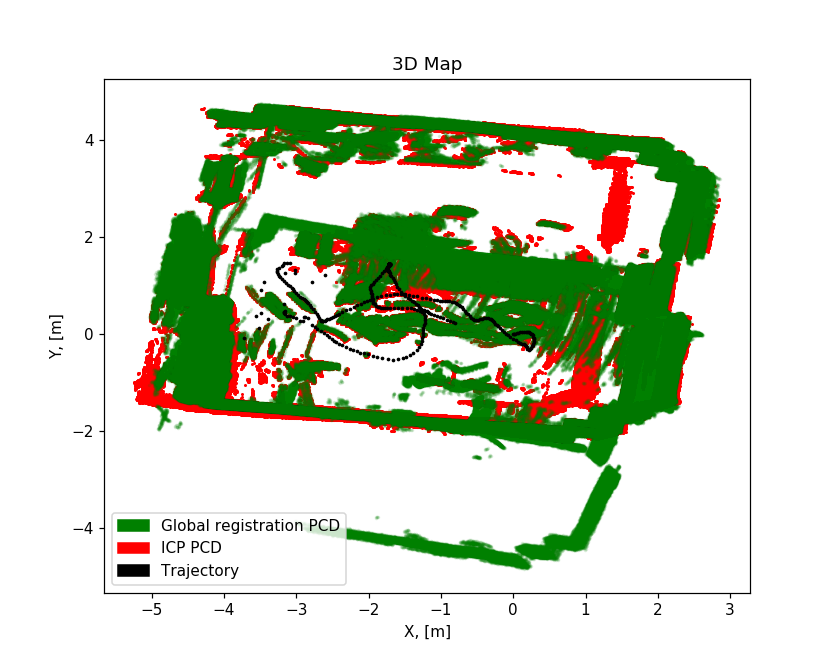

In [10]:
pathPoses = r"/Users/debunt/Work_Learning/programming/Robotics_Project_3DMap/Velodyne3DMap/Velodyne_3Dmap/data/2020-03-13-20-14-16/results/3DPoses"
poses = load_obj(pathPoses)
fig = plt.figure(1)
path = r"/Users/debunt/Work_Learning/programming/Robotics_Project_3DMap/Velodyne3DMap/Velodyne_3Dmap/data/2020-03-13-20-14-16/results/ICP_PCD - Cloud_cleaned.txt"
pcd = np.genfromtxt(path, delimiter=" ")
plt.scatter(pcd[:,0], pcd[:,1], s=1, c="r")



path = r"/Users/debunt/Work_Learning/programming/Robotics_Project_3DMap/Velodyne3DMap/Velodyne_3Dmap/data/2020-03-13-20-14-16/global_asci - Cloud_cleaned.txt"
pcd = np.genfromtxt(path, delimiter=" ")
plt.scatter(pcd[:,0], pcd[:,1], s=2, c="g", alpha=0.1)
plt.title("3D Map")
plt.ylabel("Y, [m]")
plt.xlabel("X, [m]")

plt.scatter(poses[:,0,3], poses[:,1,3], s=2, c="black") 

plt.legend(handles=[mpatches.Patch(color='green', label='Global registration PCD'),
                    mpatches.Patch(color='red', label='ICP PCD'), 
                    mpatches.Patch(color='black', label='Trajectory')])
plt.show()


In [1]:
import open3d
import os
import numpy as np
import copy
files = []
path = r"/Users/debunt/Work_Learning/programming/Robotics_Project_3DMap/Velodyne3DMap/Velodyne_3Dmap/data/2020-03-13-20-14-16/global"


for (dirpath, dirnames, filenames) in os.walk(path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))
pcds = open3d.io.read_point_cloud(files[0], format="pcd")
for file in files[1:]:
    pcd = open3d.io.read_point_cloud(file, format="pcd")
    pcds += pcd

path = os.path.join(os.path.dirname(path), (os.path.basename(path).split(".")[0] + "_asci" + ".pcd"))
open3d.io.write_point_cloud(path, pcds, write_ascii=True)
path

'/Users/debunt/Work_Learning/programming/Robotics_Project_3DMap/Velodyne3DMap/Velodyne_3Dmap/data/2020-03-13-20-14-16/global_asci.pcd'